<a href="https://colab.research.google.com/github/chiwangchic/hello-world/blob/master/lecture12%2613_Decision%20tree%26%20LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First import all the necessary libraries

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.model_selection import train_test_split #train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns

Load the iris dataset as pandas dataframe


In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
feature_cols = ['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
X = iris[feature_cols]
y = iris.species

print(set(y))

{'versicolor', 'setosa', 'virginica'}


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [7]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


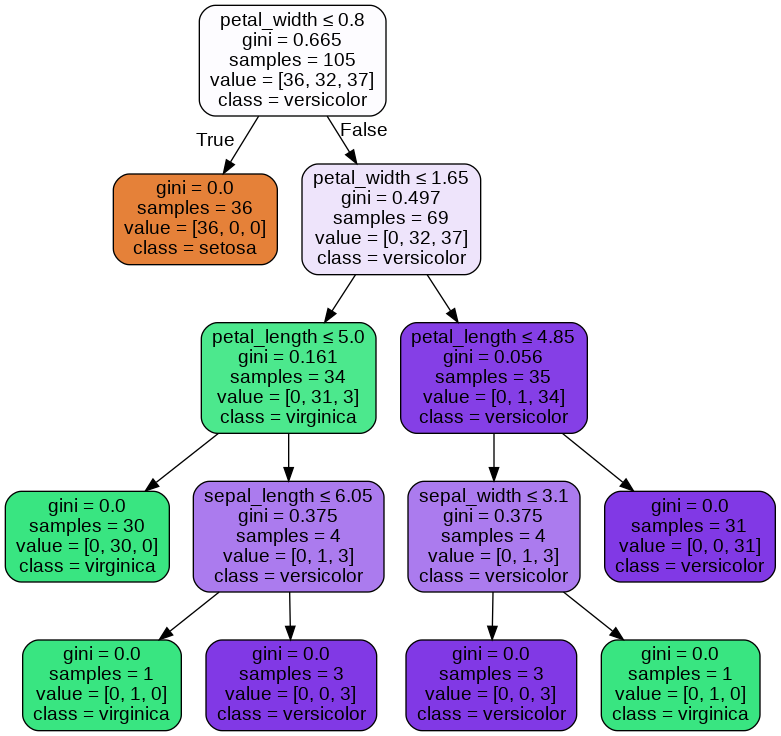

In [8]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=['setosa', 'virginica', 'versicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iristree.png')
Image(graph.create_png())

LInear Regression and Logistic regression

In [0]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [16]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898207

### Explained variance score: 1 is perfect prediction and 0 means that there is no linear relationship between X and y.)

In [17]:
regr.score(diabetes_X_test, diabetes_y_test) 

0.5850753022690575

### Logistic regression

In [18]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
log = linear_model.LogisticRegression(solver='lbfgs', C=1e5, multi_class='multinomial')

log.fit(iris_X, iris_y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)